## Directed BBKNN demo

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse
import anndata
import scvelo as scv

In [3]:
figdir = "/home/jovyan/mount/gdrive/Pan_fetal/Updates_and_presentations/figures/PAGA_graphs/"
if os.path.exists(figdir):
    sc.settings.figdir = "/home/jovyan/mount/gdrive/Pan_fetal/Updates_and_presentations/figures/PAGA_graphs/"
else:
    os.mkdir(figdir)
    sc.settings.figdir = "/home/jovyan/mount/gdrive/Pan_fetal/Updates_and_presentations/figures/PAGA_graphs/"
    

In [4]:
## import utils
cwd = '../utils/'
sys.path.append(cwd)

import genes
import panfetal_utils
import ti_utils

### Load data

In [7]:
adata = sc.datasets.paul15()

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, copying.


### Traj inference

In [9]:
sc.pp.recipe_zheng17(adata)
sc.tl.pca(adata, svd_solver='arpack')

In [10]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)

In [11]:
sc.tl.dpt(adata)

In [12]:
sc.tl.umap(adata)

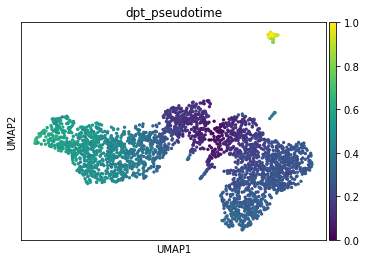

In [13]:
sc.pl.umap(adata, color="dpt_pseudotime")

### Make fake batches by splitting at different levels of pseudotime

In [101]:
from scipy.special import logit
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import uniform
from scipy.stats import logistic

In [79]:
def min_max_scale(x):
    x_s = (max(x) - x )/(max(x) - min(x))
    return(x_s)

In [158]:
# r1 = uniform.rvs(size=adata.n_obs)
# r2 = skewnorm.rvs(-1,size=adata.n_obs)
# r3 = skewnorm.rvs(-10,size=adata.n_obs)
# plt.hist(min_max_scale(r1, bins=100);
# plt.hist(min_max_scale(r2), bins=100);
# plt.hist(min_max_scale(r3), bins=100);

# keep_1 = np.random.binomial(1,p=min_max_scale(r2), size=adata.n_obs)
# keep_2 = np.random.binomial(1,p=min_max_scale(r2), size=adata.n_obs)
# keep_3 = np.random.binomial(1,p=min_max_scale(r3), size=adata.n_obs)

# adata1 = adata[adata.obs.sort_values("dpt_pseudotime").index[keep_1==1]]
# adata2 = adata[adata.obs.sort_values("dpt_pseudotime").index[keep_2==1]]
# adata3 = adata[adata.obs.sort_values("dpt_pseudotime").index[keep_3==1]]


In [169]:

adata1 = adata[adata.obs["dpt_pseudotime"] < 0.2]
adata2 = adata[adata.obs["dpt_pseudotime"] < 0.4]
adata3 = adata[adata.obs["dpt_pseudotime"] < 1]

In [170]:
adata.obs["keep_1"] = adata.obs_names.isin(adata1.obs_names)
adata.obs["keep_2"] = adata.obs_names.isin(adata2.obs_names)
adata.obs["keep_3"] = adata.obs_names.isin(adata3.obs_names)


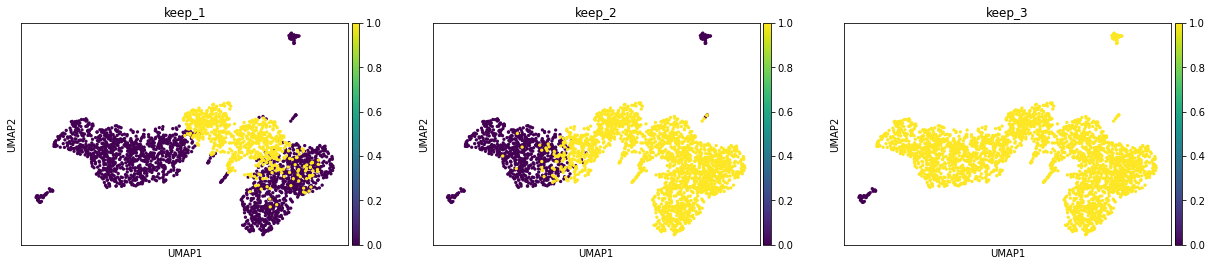

In [171]:
sc.pl.umap(adata, color=["keep_1", "keep_2", "keep_3"])

In [201]:
## Add noise
def add_noise(adata):
    for g in range(adata.n_vars):
        n1 = norm.rvs(0,0.1,size=adata.n_obs)
        adata.X[:,g] = adata.X[:,g] + n1
    return(adata)


In [202]:
adata1 = add_noise(adata1)
adata2 = add_noise(adata2)
adata3 = add_noise(adata3)

In [203]:
big_adata = anndata.concat([adata1, adata2, adata3])

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [207]:
big_adata.obsm = None

In [208]:
sc.tl.pca(big_adata)
sc.pp.neighbors(big_adata, n_neighbors=3, n_pcs=20)
sc.tl.umap(big_adata)

/home/jovyan/my-conda-envs/emma_env/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


... storing 'paul15_clusters' as categorical


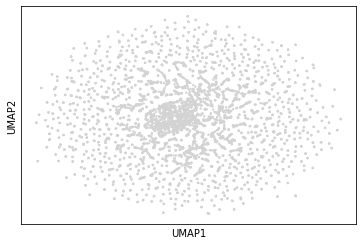

In [209]:
sc.pl.umap(big_adata)